- Name: Lim Yu Liang
- Admin Number: 2227452
- Title: Investing in Singapore Real Estate

Dataset Links:

- https://data.gov.sg/dataset/resale-flat-prices
- https://data.gov.sg/dataset/median-rent-by-town-and-flat-type
- https://data.gov.sg/dataset/renting-out-of-flats?resource_id=9caa8451-79f3-4cd6-a6a7-9cecc6d59544

Context/Overarching Question:

- Where and what is the best investment decision a Real Estate investor can make, when trying to make money using Real Estate in Singapore?

- Investments are very long term, typically about 20 to 30 years.

Key points to take note of:

- With Real Estate comes with varying types of flats in Singapore. 
    - What is the flat type with the most number of recorded relevant data?
    - What does more relevant recorded data translate to?
    
                                                    ========
                                                    
- There are multiple towns in Singapore.
    - Which town in Singapore is the best place for Real Estate investors to invest in?
    
                                                    ========

- Business brings trends.
    - What are the trends for rentals like in the towns of Singapore?
    - What does the rental trend of each town speak about the volatility of the Real Estate market in each respective town?
    
                                                    ========

- Trends are unpredictable and may rise or fall anytime depending on the timing.
  - What is the best timing for Real Estate investors to consider diving into Singapore's Real Estate industry, in order to make the most money?
  
                                                  ========
  
- Consumers should be taken into an account as well.
  - Diving into the Real Estate does not just mean purchasing a house, and renting it out at the highest possible price.
  - What is the best/most-suitable price range, where most consumers are willing to fork out their money, in order to rent out a flat from you?
  - Thinking from the consumer's point of view is important as well, because financial capability is also a varying subject for everyone.
  

=======================================================================================================================================

Concatenating all of the CSV Files together to have an easier time handling all the data at once (excluding the median-rent dataset)

Problem: In the median_rent dataset there were towns that were duplicated because some ended with Spaces while some had no spaces, some 'KALLANG/WHAMPOA' were labelled as 'KALLANG/ WHAMPOA'
Solution: Loop through ['town'] and do .strip() to remove any whitespaces. Use the if condition to check if 'KALLANG' is in the current ['town'] iteration, then replace it with 'KALLANG/WHAMPOA'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# File paths for the CSV files
resale_1990_1999 = './resale-flat-price-CSVs/resale-flat-prices-based-on-approval-date-1990-1999.csv'
resale_2000_2012 = './resale-flat-price-CSVs/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv'
resale_mar2012_dec2014 = './resale-flat-price-CSVs/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv'
resale_jan2015_dec2016 = './resale-flat-price-CSVs/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv'
resale_2017_onwards = './resale-flat-price-CSVs/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv'
median_rent = './median-rent-by-town-and-flat-type/median-rent-by-town-and-flat-type.csv'
renting_out_flats = './renting-out-of-flats.csv'

# Load the datasets from CSV files
data1 = np.genfromtxt(resale_1990_1999, encoding=None, dtype=None, delimiter=',', names=True, usecols=("month", "town", "flat_type", "lease_commence_date", "resale_price"))
data2 = np.genfromtxt(resale_2000_2012, encoding=None, dtype=None, delimiter=',', names=True, usecols=("month", "town", "flat_type", "lease_commence_date", "resale_price"))
data3 = np.genfromtxt(resale_mar2012_dec2014, encoding=None, dtype=None, delimiter=',', names=True, usecols=("month", "town", "flat_type", "lease_commence_date", "resale_price"))
data4 = np.genfromtxt(resale_jan2015_dec2016, encoding=None, dtype=None, delimiter=',', names=True, usecols=("month", "town", "flat_type", "lease_commence_date", "resale_price"))
data5 = np.genfromtxt(resale_2017_onwards, encoding=None, dtype=None, delimiter=',', names=True, usecols=("month", "town", "flat_type", "lease_commence_date", "resale_price"))
data6 = np.genfromtxt(median_rent, encoding=None, dtype=None, delimiter=',', names=True, usecols=("quarter", "town", "flat_type", "median_rent"))
data7 = np.genfromtxt(renting_out_flats, encoding=None, dtype=None, delimiter=',', names=True, usecols=("rent_approval_date", "town", "flat_type", "monthly_rent"))

# Combine the datasets into one array
concatenated_data = np.concatenate((data1, data2, data3, data4, data5))

# Save the combined array to a new CSV file 
#Just used for checking
#np.savetxt('combined_data.csv', concatenated_data, delimiter=',', fmt='%s')

#Data sanitation
def sanitization_function():
    #counter = 0
    for i in range(len(concatenated_data)):
        concatenated_data[i]['town'] = concatenated_data[i]['town'].strip()

    for i in range(len(data6)):
        data6[i]['town'] = data6[i]['town'].strip()
        
        if 'KALLANG' in data6[i]['town']:
            data6[i]['town'] = 'KALLANG/WHAMPOA'

        if not data6[i]['median_rent'].isnumeric() or data6[i]['median_rent'] == 'na':
            data6[i]['median_rent'] = 'NA'
            
        # if ('2020' in data6[i]['quarter'] or '2021' in data6[i]['quarter'] or '2022' in data6[i]['quarter'] or '2023' in data6[i]['quarter']) and (data6[i]['median_rent'] == 'NA'):
        #    counter += 1
        # Used to debug amount of filtered out 'NA'
    #print(counter)

#Calls the function to sanitize dirty data within the CSVs
sanitization_function()

#Checks to see if the number of towns in the median_rent dataset corelates to the concatenated dataset
''' unique_towns = np.unique(concatenated_data['town'])
unique_towns2 = np.unique(data6['town'])
print(len(unique_towns))
print(len(unique_towns2)) '''


" unique_towns = np.unique(concatenated_data['town'])\nunique_towns2 = np.unique(data6['town'])\nprint(len(unique_towns))\nprint(len(unique_towns2)) "

Graph 1 - Pie Chart

Dataset used: 
- resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv
- median-rent-by-town-and-flat-type.csv

Nature of the datasets:
- "median-rent-by-town-and-flat-type.csv": This dataset contains information about the median rent for each town and flat type, based on each Quarter of the year

- "resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv": This dataset contains information about flats that are up for resale, including their Registration Date, Town, Flat Type, Block, Street Name, Storey Range, Floor Area Sqm, Flat Model, Lease Commence Date, Remaining Lease, Resale Price

Pecularities: 
- The median-rent dataset included some data from 2023 but the resale dataset did not, hence, I decided to keep to using collected data from 2020 - 2022 only in order to keep the data comparisons between Flat Types fair and accurate

Question/Goal:
- Which flat type have the most recorded data amongst both Resale and calculated Median Rent?


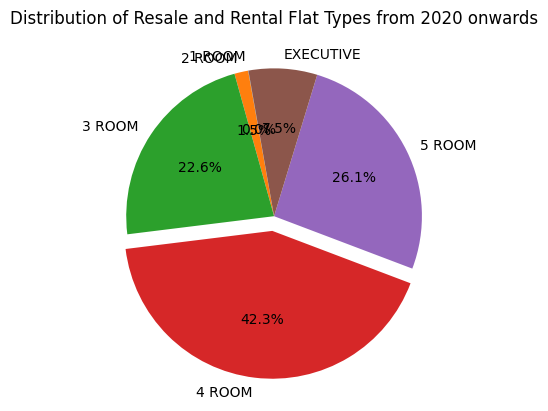

In [9]:
#Creating 2 lists for flat_types with different naming conventions
flat_types = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE']
flat_types_abbr = ['1-RM', '2-RM', '3-RM', '4-RM', '5-RM', 'EXEC']

#Creates 2 lists for the years that each dataset will be using
data5_years = ['2021', '2022']
data6_years = ['2021', '2022']

#Filters through the columns in data5 and 6, based on whether 2020,2021 or 2022 exists in their respective "Time-naming-conventions"
#If the median rent column for the specific item in data6 is 'NA', it will not be taken into consideration as a valid recorded data
filtered_data5 = np.array([item for item in data5 if any(year in item['month'] for year in data5_years)])
filtered_data6 = np.array([item for item in data6 if any(year in item['quarter'] for year in data6_years) and item['median_rent'] != 'NA'])

room_type_counts = []
#Zips the 2 lists into a single iterable
for flat_type, flat_type_abbr in zip(flat_types, flat_types_abbr):
    #Selects all recorded data that matches the flat_type naming conventions, for data5 and 6 respectively from filtered_data5 and 6
    data5_flat = filtered_data5[filtered_data5['flat_type'] == flat_type]
    data6_flat = filtered_data6[filtered_data6['flat_type'] == flat_type_abbr]
    #Counts the total number of recorded data for each flat_type by using len() and append it into the room_type_counts list
    #Going in the order of 1 ROOM, 2 ROOM, 3 ROOM... fashion
    total_count = len(data5_flat) + len(data6_flat)
    room_type_counts.append(total_count)

#Explodes the most number of recorded data flat_type towards to use for easier visualisation
explode = [0, 0, 0, 0.1, 0, 0]

#Plots the graph
plt.pie(room_type_counts, labels=flat_types, autopct='%1.1f%%', startangle=100, explode=explode)
plt.title('Distribution of Resale and Rental Flat Types from 2021 onwards')
plt.show()



Findings and Insight:

 - Based on the displayed Pie Chart, it is shown that 4-ROOM Flat Types have the most amount of relevant resale and rental data recorded.

 - This would make 4-ROOM Flat Type the most optimal choice to invest in, since the market for 4-ROOM Flat Types have the highest number of activity across recent years

Summary:
- Out of all the flat types, 4 Room flat types have the most collected data overall, which would translate to the 4 Room flats having significantly higher market activities, having more supply and demand in general, as well as more business opportunites for investors to take advantage of. This would make 4 Room flats the most optimal flat type for investment plans.

=======================================================================================================================================

Graph 2 - Bar Graph

Dataset used: 
- renting-out-of-flats.csv

Nature of the dataset:
- This dataset contains information on each successful/approved rental, including Approval Date, Town, Block, Street Name, Flat Type and Monthly Rent

Questions/Goals:

- What is the total number of rentals that were approved in each Town?

- Which towns (have the most/are the most popular) in collected data when it comes to number of recorded approved rentals?

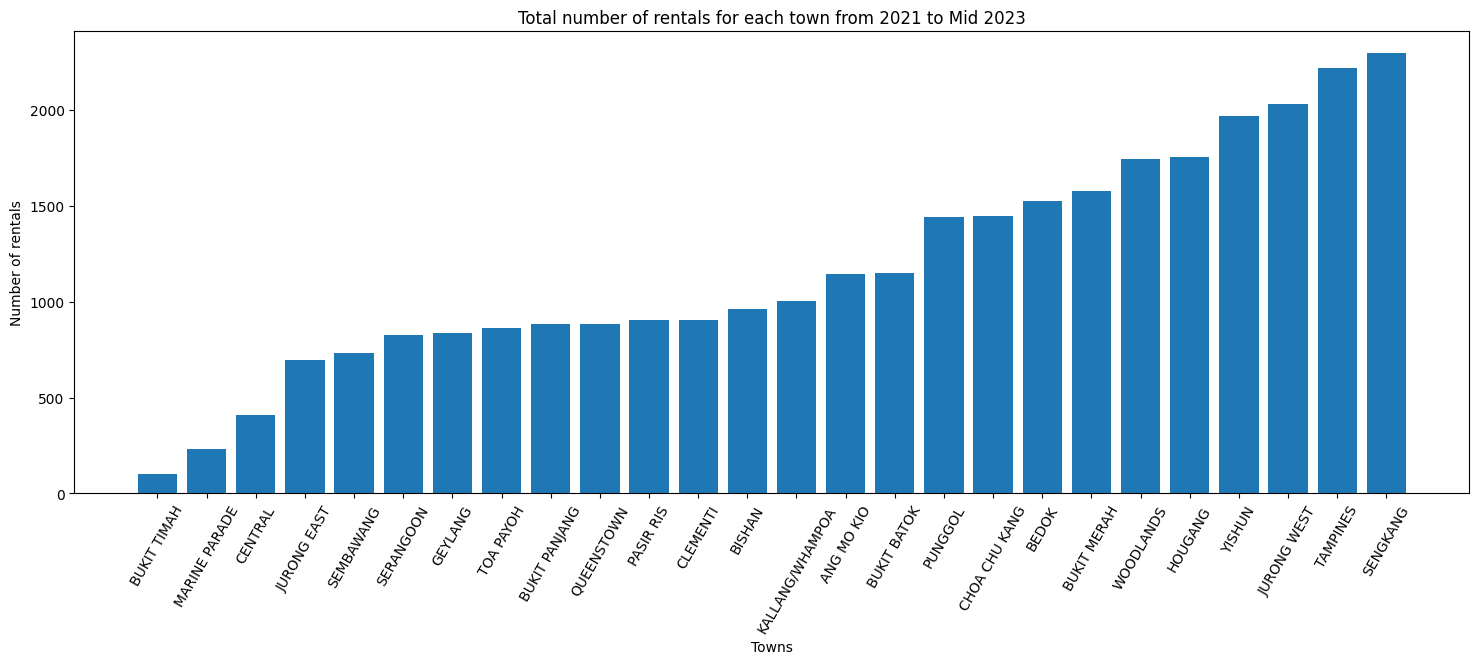

In [4]:
#Converting data7 into an numpy array
data7_np = np.array(data7)

#Initializing an empty dictionary
dict = {}

#List of all the towns in Singapore
towns = [
    'ANG MO KIO',
    'BEDOK',
    'BISHAN',
    'BUKIT BATOK',
    'BUKIT MERAH',
    'BUKIT PANJANG',
    'BUKIT TIMAH',
    'CENTRAL',
    'CHOA CHU KANG',
    'CLEMENTI',
    'GEYLANG',
    'HOUGANG',
    'JURONG EAST',
    'JURONG WEST',
    'KALLANG/WHAMPOA',
    'MARINE PARADE',
    'PASIR RIS',
    'PUNGGOL',
    'QUEENSTOWN',
    'SEMBAWANG',
    'SENGKANG',
    'SERANGOON',
    'TAMPINES',
    'TOA PAYOH',
    'WOODLANDS',
    'YISHUN'
]

#Graph labels
x_label = 'Towns'
y_label = 'Number of rentals'
title = 'Total number of rentals for each town from 2021 to Mid 2023'

#Graph Configurations
plt.figure(figsize=(18,6))
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
plt.xticks(rotation=60)

#Iteration that loops through every town from the towns list
for town in towns:  
    for item in data7_np:
        #Declaring columns as variables for easier referencing
        flat_type = item['flat_type']

        if town == item['town']:
            town = item['town']
            if (flat_type == '4-ROOM'):
                try:
                    town_rental_count = {town: dict[town] + 1}
                except:
                    town_rental_count = {town: 1}
                
                dict.update(town_rental_count)

#Sorts the dictionary by looking at the values of the keys in ascending order
sorted_dict = sorted(dict.items(), key=lambda x:x[1])

#Creates 2 lists, 1 containing the towns and the other containing the counts respective to those towns in ascending order
sorted_towns = [item[0] for item in sorted_dict]
sorted_counts = [item[1] for item in sorted_dict]

#Plots and shows the bar graph
plt.bar(sorted_towns, sorted_counts)
plt.show()







Findings and Insight:

- The bar graph above represents the total number of approved rentals for each Town from January 2021 - April 2023 in ascending order

- Through the usage of bar graph visualisation, the top few towns with the most number of recorded rentals are Yishun, Jurong West, Tampines and Serangoon being the highest

Summary:
- The findings above are especially useful because it allows us to be able to identify and weed out the non-popular areas so that the investor can make the most optimal investment decision according to the different demands for rental for different towns/areas. 

- Based on this analysis, investors should focus mainly on Yishun, Jurong West, Tampines and Sengkang, as potential areas of interests for investment purposes, because these 4 towns have the most number of rentals across the more recent years (2021 -  Mid 2023), meaning the opportunity to make money from these towns are significantly higher than the towns if lesser overall number of rentals

=======================================================================================================================================

Graph 3 - Line Graph

Dataset used:
- renting-out-of-flats.csv

Nature of the dataset:
- This dataset contains information on each successful/approved rental, including Approval Date, Town, Block, Street Name, Flat Type and Monthly Rent

Pretext:
- We have identified the top few towns that has the most number of recorded approved rentals

Question/Goal:
- Identify. What are the trends for the number of rentals happening each month in these top few towns like over the recent years?


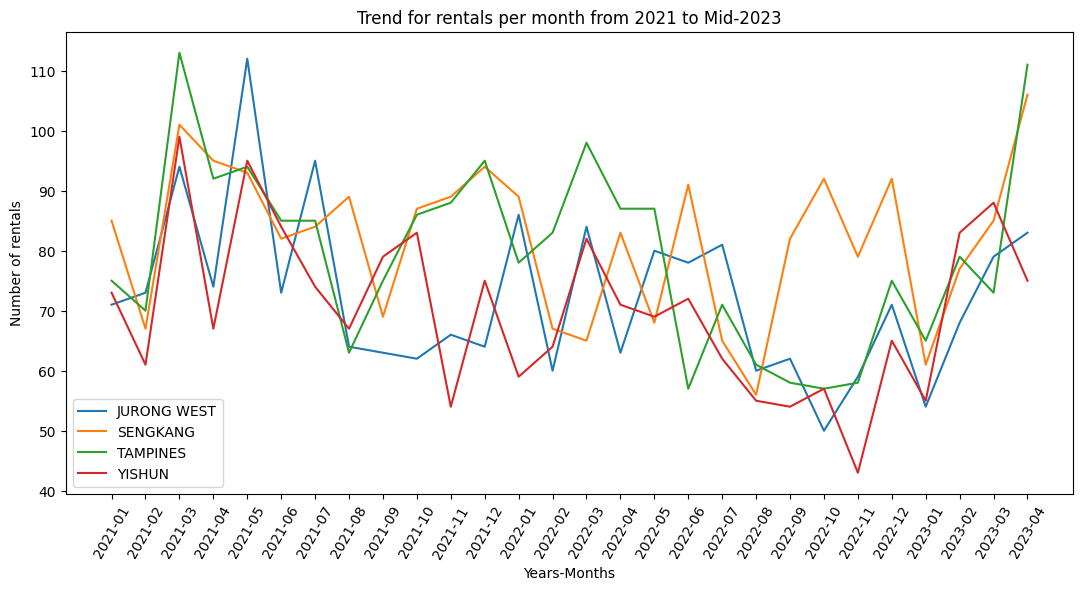

In [5]:
#A list of all the towns in Singapore, commented towns are towns that were not chosen to be apart of this specific Data Visualisation process
towns = [
    # 'ANG MO KIO',
    # 'BEDOK',
    # 'BISHAN',
    # 'BUKIT BATOK',
    # 'BUKIT MERAH',
    # 'BUKIT PANJANG',
    # 'BUKIT TIMAH',
    # 'CENTRAL',
    # 'CHOA CHU KANG',
    # 'CLEMENTI',
    # 'GEYLANG',
    # 'HOUGANG',
    # 'JURONG EAST',
    'JURONG WEST',
    # 'KALLANG/WHAMPOA',
    # 'MARINE PARADE',
    # 'PASIR RIS',
    # 'PUNGGOL',
    # 'QUEENSTOWN',
    # 'SEMBAWANG',
    'SENGKANG',
    # 'SERANGOON',
    'TAMPINES',
    # 'TOA PAYOH',
    # 'WOODLANDS',
    'YISHUN'
]

#Variables used in Graph Configurations
x_label = 'Years-Months'
y_label = 'Number of rentals'
title = 'Trend for rentals per month from 2021 to Mid-2023'

#Graph Configurations
plt.figure(figsize=(13,6))
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
plt.xticks(rotation=60)

#Loops through the selected towns only
for town in towns:
    #Dictionary resets with each new town's iteration
    dict={}
    for item in data7_np:

        #Declaring Variables
        flat_type = item['flat_type']

        if town == item['town']:

            town = item['town']
            rent_approval_date = item['rent_approval_date']

            if (flat_type == '4-ROOM'):
                try:
                    new = {rent_approval_date: dict[rent_approval_date] + 1}
                except:
                    new = {rent_approval_date: 1}
                
                dict.update(new)

    #Graph is plotted with each iteration of towns to prevent cluttering
    plt.plot(dict.keys(), dict.values())
    


plt.legend(towns)
plt.show()

Findings and Insight:

- The towns that should be kept in mind would be Jurong West, Seng Kang and Tampines.

- Yishun is not chosen. Based on the trend for number of rentals happening a month for Yishun, the market for flat rentals in Yishun seems to be quite volatile since Yishun has a highest of peak 100 rentals a month and the lowest of about 40 rentals a month.

- Not only that, currently in April 2023, Yishun flat rentals seem to be going on a decline.

- Jurong West, Seng Kang and Tampines each have a more stable market. Not only that, the demands for flat rentals in Seng Kang and Tampines are rising at a rapid rate and Jurong West flats are increasing at a slightly slower but steady rate 

Summary:
- By identifying the trend for the number of rentals happening each month, enables us to visualize whether the demand for a certain town is declining or increasing at the moment, as well as the volatility of the market for each town. In this case, Yishun's demand for rental flats are currently on a decline, not only that, the market for rental flats in Yishun tend to be very volatile, because when rental demand drops for Yishun, it tends to drop significantly. 

- However, other towns such as SengKang, Jurong West and Tampines, the rental demands are currently on a rise, their market for rental flats are a lot more stable as well, staying above 60 rentals a month most of the time.

=======================================================================================================================================

Graph 4 - Scatter Plot

Dataset used:
- median-rent-by-town-and-flat-type.csv
- resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv

Nature of the datasets:
- "median-rent-by-town-and-flat-type.csv": This dataset contains information about the median rent for each town and flat type, based on each Quarter of the year

- "resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv": This dataset contains information about flats that are up for resale, including their Registration Date, Town, Flat Type, Block, Street Name, Storey Range, Floor Area Sqm, Flat Model, Lease Commence Date, Remaining Lease, Resale Price

Pecularities:
- There are duplicated data for the CSV 'median-rent-by-town-and-flat-type.csv'
- To solve this issue, the mean of the duplicated data is taken, and that value used to plot the graph.

Pretext:
- The trend of the top 4 towns with the most number of rentals that has happened over the recent years (2021-2023) is displayed above.

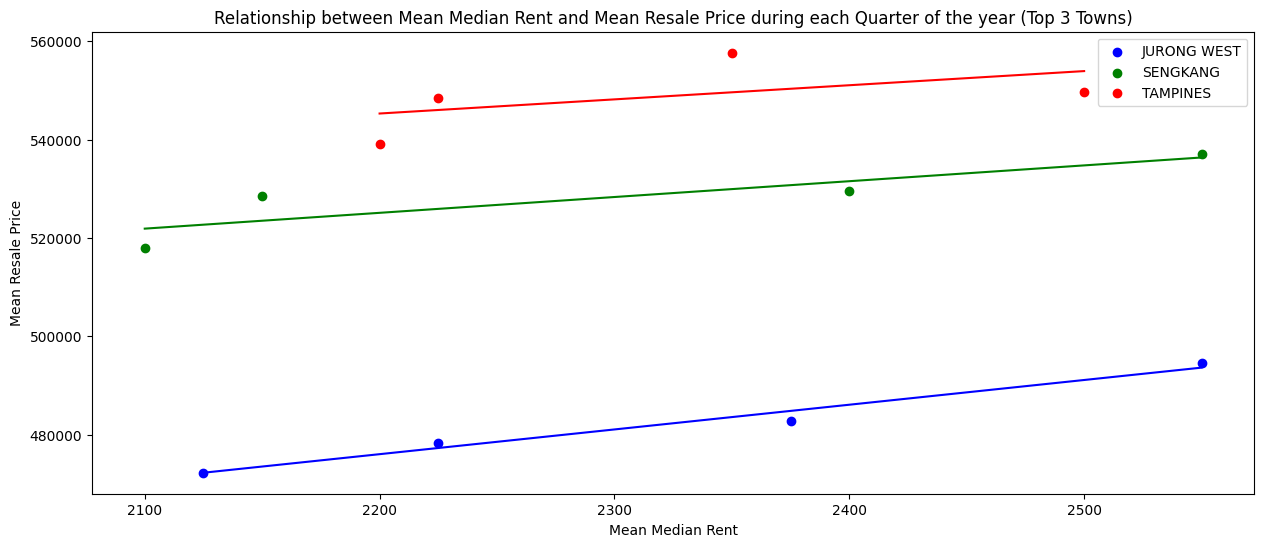

In [6]:
data5_np = np.array(data5)
data6_np = np.array(data6)

#The top few towns that have been identified from previous graphs
top_towns = [
    'JURONG WEST',
    'SENGKANG',
    'TAMPINES',
]

#Generates a list of 'year-month' for the 'for loop' to iterate through. e.g. 2021-01 followed by 2021-02 and 2021-03, so on
recent_months_resale = []

start_year = 2021
start_month = 1

while start_year < 2024 or start_year == 2022:
    month_str = str(start_month).zfill(2)
    recent_months_resale.append(f'{start_year}-{month_str}')
    
    start_month += 1
    
    if start_month > 12:
        start_month = 1
        start_year += 1

#Generates a list of 'year-quarter' for the 'for loop' to iterate through. e.g. 2021-Q1 followed by 2021-Q2 and 2021-Q3, so on
quarters_median_rent = []

start_year = 2021
start_quarter = 1

while start_year < 2024 or start_year == 2022:
    quarter_str = str(f'Q{start_quarter}')
    quarters_median_rent.append(f'{start_year}-{quarter_str}')
    
    start_quarter += 1
    
    if start_quarter > 4:
        start_quarter = 1
        start_year += 1

#Certain Graph configurations to make the graph more "readable" and intepretable
x_label = 'Mean Median Rent'
y_label = 'Mean Resale Price'
title = 'Relationship between Mean Median Rent and Mean Resale Price during each Quarter of the year (Top 3 Towns)'

#Graph configurations
plt.figure(figsize=[15,6])
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

#Maps each town to 1 colour
color_mapping = {
    'JURONG WEST': 'blue',
    'SENGKANG': 'green',
    'TAMPINES': 'red'
}

for town in top_towns:

    #During each town's iteration, the lists are reset back to empty and the color mapping changes according to the town based on the color_mapping dictionary
    colors = color_mapping[town]

    first_quarter_resale_prices = []
    second_quarter_resale_prices = []
    third_quarter_resale_prices = []
    fourth_quarter_resale_prices = []

    first_quarter_median_rent = []
    second_quarter_median_rent = []
    third_quarter_median_rent = []
    fourth_quarter_median_rent = []

    #Loops through every quarter in each year (2021 and 2022)
    for quarters in quarters_median_rent:
        for item in data6_np:

            #Declaring each column as variables for easier referencing
            flat_type = item['flat_type']
            quarter = item['quarter']

            if town == item['town']:

                #Selecting only 4 ROOM flats, categorising them in year Quarters
                if quarters == quarter:
                    if (flat_type == '4-RM') and ('Q1' in quarters):
                        if (item['median_rent'] == 'NA'):
                            item['median_rent'] = 0
                        first_quarter_median_rent.append(int(item['median_rent']))
                    elif (flat_type == '4-RM') and ('Q2' in quarters):
                        if (item['median_rent'] == 'NA'):
                            item['median_rent'] = 0
                        second_quarter_median_rent.append(int(item['median_rent']))
                    elif (flat_type == '4-RM') and ('Q3' in quarters):
                        if (item['median_rent'] == 'NA'):
                            item['median_rent'] = 0
                        third_quarter_median_rent.append(int(item['median_rent']))
                    elif (flat_type == '4-RM') and ('Q4' in quarters):
                        if (item['median_rent'] == 'NA'):
                            item['median_rent'] = 0
                        fourth_quarter_median_rent.append(int(item['median_rent']))

    #Finding the mean resale price for each quarter 
    first_quarter_median_rent = np.mean(first_quarter_median_rent)
    second_quarter_median_rent = np.mean(second_quarter_median_rent)
    third_quarter_median_rent = np.mean(third_quarter_median_rent)
    fourth_quarter_median_rent = np.mean(fourth_quarter_median_rent)

    #Loop through every month in each year (2021 and 2022)
    for months in recent_months_resale:

        for item in data5_np:
            
            #Declaring each column as variables for easier referencing
            flat_type = item['flat_type']
            month = item['month']

            if town == item['town']:

                #Categorizing them in Quarters. e.g. Quarter 1 of the year consists of the first 3 months, Jan, Feb, Mar 
                if months == month:
                    if (flat_type == '4 ROOM') and ('-01' in months) or ('-02' in months) or ('-03' in months):
                        first_quarter_resale_prices.append(item['resale_price'])
                    elif (flat_type == '4 ROOM') and ('-04' in months) or ('-05' in months) or ('-06' in months):
                        second_quarter_resale_prices.append(item['resale_price'])
                    elif (flat_type == '4 ROOM') and ('-07' in months) or ('-08' in months) or ('-09' in months):
                        third_quarter_resale_prices.append(item['resale_price'])
                    elif (flat_type == '4 ROOM') and ('-10' in months) or ('-11' in months) or ('-12' in months):
                        fourth_quarter_resale_prices.append(item['resale_price'])
    
    #Taking the mean resale price for the each Quarter of both years
    first_quarter_resale_prices = np.mean(first_quarter_resale_prices)
    second_quarter_resale_prices = np.mean(second_quarter_resale_prices)
    third_quarter_resale_prices = np.mean(third_quarter_resale_prices)
    fourth_quarter_resale_prices = np.mean(fourth_quarter_resale_prices)

    # Calculate best-fit line
    x = [first_quarter_median_rent, second_quarter_median_rent,
         third_quarter_median_rent, fourth_quarter_median_rent]
    y = [first_quarter_resale_prices, second_quarter_resale_prices,
         third_quarter_resale_prices, fourth_quarter_resale_prices]
    coeffs = np.polyfit(x, y, 1)  # Fit a linear polynomial of degree 1
    best_fit_line = np.poly1d(coeffs)
    x_range = np.linspace(min(x), max(x), 100)

    #The points are plotted during every iteration and lists are resetted so as to prevent usage of too many lists
    plt.scatter(first_quarter_median_rent, first_quarter_resale_prices, color=colors, label=town)
    plt.scatter(second_quarter_median_rent, second_quarter_resale_prices, color=colors)
    plt.scatter(third_quarter_median_rent, third_quarter_resale_prices, color=colors)
    plt.scatter(fourth_quarter_median_rent, fourth_quarter_resale_prices, color=colors)
    plt.plot(x_range, best_fit_line(x_range), color=colors)

    #Mainly used for debugging only
    # print(f'{town}:')
    # print(f'The mean resale value of flats in {town} from Jan to Mar {months[:4]} is: $','{:,.0f}'.format(first_quarter_resale_prices))
    # print(f'The mean median rent of flats in {town} from Jan to Mar {months[:4]} is: $','{:,.0f}'.format(first_quarter_median_rent), '\n')
    # print(f'The mean resale value of flats in {town} from Apr to June {months[:4]} is: $','{:,.0f}'.format(second_quarter_resale_prices))
    # print(f'The mean median rent of flats in {town} from Apr to June {months[:4]} is: $','{:,.0f}'.format(second_quarter_median_rent), '\n')
    # print(f'The mean resale value of flats in {town} from July to Sept {months[:4]} is: $','{:,.0f}'.format(third_quarter_resale_prices))
    # print(f'The mean median rent of flats in {town} from July to Sept {months[:4]} is: $','{:,.0f}'.format(third_quarter_median_rent), '\n')
    # print(f'The mean resale value of flats in {town} from Oct to Dec {months[:4]} is: $','{:,.0f}'.format(fourth_quarter_resale_prices))
    # print(f'The mean median rent of flats in {town} from Oct to Dec {months[:4]} is: $','{:,.0f}'.format(fourth_quarter_median_rent), '\n')

#Show the graph with respective legends
plt.legend()
plt.show()



            
    

Findings and Insight:
- Based on the scatter plot above, on average, mean median rent during the fourth quarter of the year, from years 2021-2022 have shown to be the highest

- 2 Places that should be taken note of would be Seng Kang and Jurong West.

- Jurong West offering the lowest resale price with the highest rent, being the most profitable town to invest in.

- Seng Kang offers a slightly higher Mean Resale Price for about the same Rent.

- Tampines's Mean resale price is too high for the price for rent, being slightly less favourable when considering investment

Things to take note of:
- Both Seng Kang and Jurong west rental demands are increasing, with Seng Kang's demands increasing rapidly while Jurong West's demands increasing but at a slower rate as compared to Seng Kang.

Summary:
- With this scatter plot, the best time for an investor to start investing would be during the 4th Quarter of the year, where generally the extra Rent that the investor would be earning as compared to from 1st Quarter to 4th Quarter, can easily cover the cost of increase in resale price within less than half the time frame allocated to the investment.

=======================================================================================================================================

Graph 5 - Histogram

Dataset used: 
- renting-out-of-flats.csv

Nature of the dataset:
- This dataset contains information on each successful/approved rental, including Approval Date, Town, Block, Street Name, Flat Type and Monthly Rent

Question:
- What is a suitable price range to rent out a flat, whereby the most number of people will be willing to pay for?

Goal:
- The goal for this histogram is to identify the best price range to be renting out a flat in Sengkang, such that the most number of people will be willing to pay for. Counting in the factor of landlords being the ones to decide the final Rental charges.

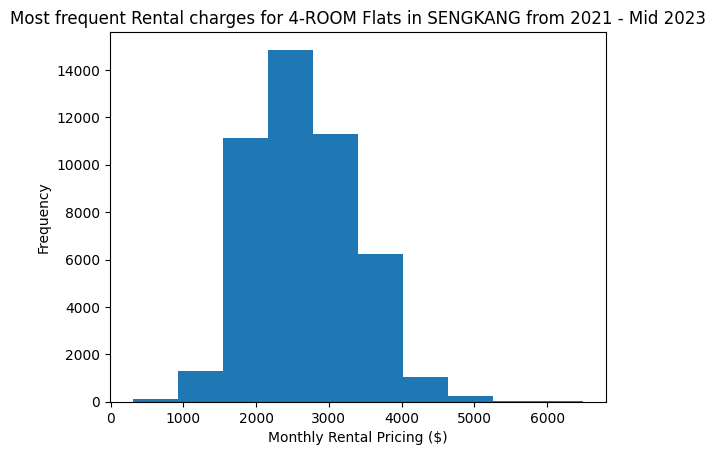

In [7]:
#Creating an empty list to store all the monthly rental prices
rental_price_list = []

#Iterate through every object that has town as SENGKANG and is a 4 ROOM
#Taking data only from 2021,2022 and 2023 for most relevancy
for item in data7_np:
    flat_type = item['flat_type']
    monthly_rent = item['monthly_rent']
    month = item['rent_approval_date']
    town = item['town']
    if (flat_type == '4 ROOM') and (town == 'SENGKANG') and ('2021' in month) or ('2022' in month) or ('2023' in month):
        rental_price_list.append(monthly_rent)

x = rental_price_list

#Plotting the graph itself
plt.hist(x, bins=10)
plt.figure
plt.xlabel('Monthly Rental Pricing ($)')
plt.ylabel('Frequency')
plt.title('Most frequent Rental charges for 4-ROOM Flats in SENGKANG from 2021 - Mid 2023')
plt.show()



Findings and Insight:
- The price range of $1600 - $3400 a month seems to be a popular range, where people are willing pay for their rentals.

- Around $2500 a month is very well received, with over 14,000 total rentals across 2.5 years.

- $2500 would be the most optimal rental pricing, which is the price that investors/landlords should be charging for their tenants.

Summary:
- The best price to be charging for rentals would be $2500, this is proven with statistics across the more recent years (2021- Mid 2023), whereby Monthly rental pricings that are between $2000 - $3000 have a much higher number amounts of tenants. Thus, investors should really consider renting out their flats at a rate of $2500 a month, in order to have a higher chance in 
renting out their flats.

=======================================================================================================================================

Final Conclusion

Given a small scenario:
- An investor wants to invest about $700,000 into Singapore Real Estate
- How much money will the investor make, using the factors and information that the different graphs have provided above?

In [8]:
#Variables
buy_in_price = 535000
rental_price = 2500

base_year = 30
time_to_break_even = buy_in_price/rental_price
years_to_break_even = time_to_break_even/12
cash_flow_years = base_year - years_to_break_even

most_optimal_town = 'SENGKANG'
most_optimal_time_of_the_year = 'Oct - Dec (4th Quarter of the year)'

#Best time and Best place to be investing in
print(f"The best place to be investing in would be {most_optimal_town}")
print(f'The best time to start investing would be: {most_optimal_time_of_the_year}')

#Buy-in price and recommended rental price
print(f'\nBuy-in: ${buy_in_price}')
print(f'Rental pricing: ${rental_price}')

#Number of years taken to break even with Buy-in
print(f"\nThe number of years taken to break even with the 'Buy-in' price would be: {'{:,.2f}'.format(years_to_break_even)} years")

#Money the investor will earn after breaking even with the Buy-in Price with the remaining years
total_money_earned_from_rent = cash_flow_years*12*rental_price
print(f"\nThe total amount of money that would be earned from Rental after breaking even over {'{:,.2f}'.format(cash_flow_years)} years: ${'{:,.0f}'.format(total_money_earned_from_rent)}")

#Take an assumption of about 20% depreciation in value for the flat over the years
buy_out_price = (buy_in_price/100)*80
print(f"The 'Buy-out' price of the flat: ${'{:,.0f}'.format(buy_out_price)}")

#The total amount of money he will earn after investing in 1 property for 30 years
total_money_earned = '{:,.0f}'.format(buy_out_price+total_money_earned_from_rent)
print(f"\nThe total amount of money earned in {'{:,.2f}'.format(cash_flow_years)} years after breaking even, netts to: ${total_money_earned}")




The best place to be investing in would be SENGKANG
The best time to start investing would be: Oct - Dec (4th Quarter of the year)

Buy-in: $535000
Rental pricing: $2500

The number of years taken to break even with the 'Buy-in' price would be: 17.83 years

The total amount of money that would be earned from Rental after breaking even over 12.17 years: $365,000
The 'Buy-out' price of the flat: $428,000

The total amount of money earned in 12.17 years after breaking even, netts to: $793,000
